In [53]:
include("./src/batch_algorithms.jl")
include("./src/mlqst.jl")

loss_and_gradient (generic function with 1 method)

In [2]:
using BenchmarkTools
q = 3
M = 4^q
N = 10 * 4 ^ q
# ρ_true = get_w_state(q) # true density matrix
# ρ_true = get_ghz_state(q) # true density matrix
ρ_true = get_random_state(q) # true density matrix
POVM = get_pauli_povms_positive(q)
idx_obs = rand(1:M, N)
outcomes = measure(ρ_true, POVM, idx_obs)
data = generate_data(POVM, idx_obs, outcomes)
;

In [ ]:
loss_func(ρ) = loss_func(ρ, data)
gradient(ρ) = gradient(ρ, data)

8×8 Hermitian{ComplexF64, Matrix{ComplexF64}}:
     -1.00177+0.0im          …   0.00263843+0.00302829im
  -0.00436985+0.0150541im        0.00573424-0.000462932im
 -0.000464399+0.00151425im      0.000958241-0.00119294im
  -0.00761742+0.000525298im       0.0162032+0.00569281im
  -0.00657898-0.0146638im        0.00376314+0.00170004im
  -0.00759245-0.00302676im   …   -0.0141591-0.0116232im
  -0.00143651-0.0214783im       -0.00449959+0.00506645im
   0.00263843-0.00302829im          -1.0192+0.0im

In [ ]:
d = 2^q
n_epoch = 300
ρ_init = Hermitian(Matrix{ComplexF64}(I, d, d) / d)
reset_timer!()
_, result_emd = EMD(ρ_init, n_epoch, loss_func, gradient)
reset_timer!()
_, result_pgd = PGD(ρ_init, n_epoch, loss_func, gradient)
reset_timer!()
_, result_fw = FW(ρ_init, n_epoch, loss_func, gradient)
reset_timer!()
_, result_bwrgd = BWRGD(ρ_init, n_epoch, loss_func, gradient)
min_loss = minimum([minimum(result_emd["fval"]), minimum(result_pgd["fval"])])
@printf("Minimum loss: %.4e\n", min_loss)

BW-RGD starts.
Minimum loss: 6.5337e-01


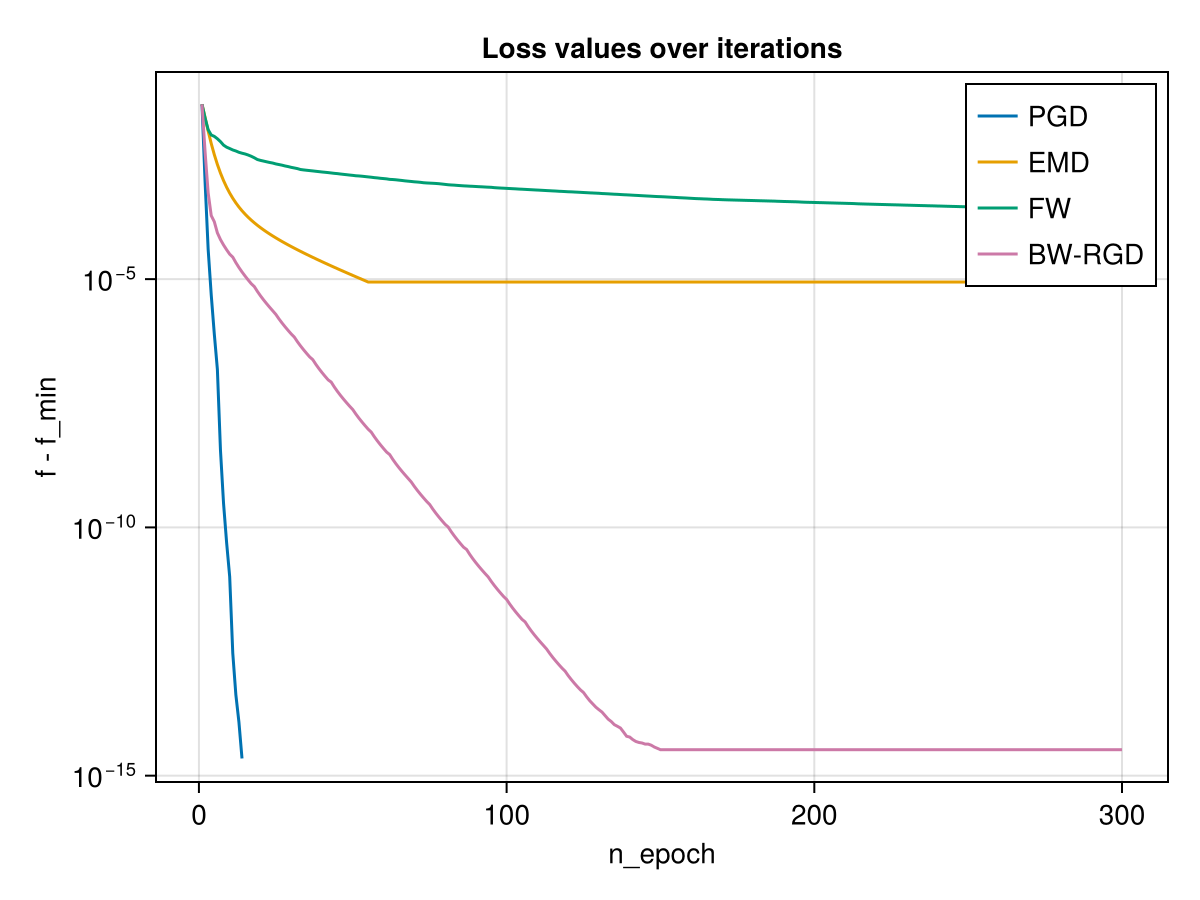

CairoMakie.Screen{IMAGE}


In [55]:
using CairoMakie
f = Figure()
ax = Axis(f[1, 1], yscale = log10)
ax.title = "Loss values over iterations"
ax.xlabel = "n_epoch"
ax.ylabel = "f - f_min"
lines!(ax, result_pgd["n_epoch"], result_pgd["fval"] .- min_loss, label = "PGD")
lines!(ax, result_emd["n_epoch"], result_emd["fval"] .- min_loss, label = "EMD")
lines!(ax, result_fw["n_epoch"], result_fw["fval"] .- min_loss, label = "FW")
lines!(ax, result_bwrgd["n_epoch"], result_bwrgd["fval"] .- min_loss, label = "BW-RGD")
axislegend(ax; position = :rt)
display(f)